# Hab Dishab Dopamine Analysis

DA data

In [13]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from hd_extension import *

In [14]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac_csvs"
brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc_csvs"
# brain_region = '#FFAF00'

In [15]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

In [16]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\n1-240507-080133\Notes.txt
read from t=0s to t=1573.39s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\n4-240507-140651\Notes.txt
read from t=0s to t=1318.23s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\nn1-250115-052028\Notes.txt
read from t=0s to t=1351.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\nn5-250114-083827\Notes.txt
read from t=0s to t=1324.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\nn6-250114-093117\Notes.txt
read from t=0s to t=1368.25s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\nn8-250114-103839\Notes.txt
read from t=0s to t=135

### Peak standard z-score

In [17]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = True)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, #otal_avg_bout_duration
                                  use_adaptive=False, 
                                  allow_bout_extension=False,
                                  mode='standard')

Processing behaviors for n1-240507-080133...
Processing behaviors for n4-240507-140651...
Processing behaviors for nn1-250115-052028...
Processing behaviors for nn5-250114-083827...
Processing behaviors for nn6-250114-093117...
Processing behaviors for nn8-250114-103839...
Computing DA metrics for n1-240507-080133 ...
Computing DA metrics for n4-240507-140651 ...
Computing DA metrics for nn1-250115-052028 ...
Computing DA metrics for nn5-250114-083827 ...
Computing DA metrics for nn6-250114-093117 ...
Computing DA metrics for nn8-250114-103839 ...


In [18]:
exp_da_dict = get_trial_dataframes(experiment)

In [19]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [20]:
da_metadata_df.head(6)

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,n1,s1-1,Investigation,1.705989,1.118747,0.609229
1,n1,s1-2,Investigation,-0.063123,0.009569,-0.158038
2,n1,s1-3,Investigation,-0.890826,-0.458356,-0.607416
3,n1,s1-4,Investigation,-0.503049,-1.395671,-1.513922
4,n1,s1-5,Investigation,-6.306067,-1.497499,-2.426088
5,n1,s2-1,Investigation,-1.092980,-0.692742,-0.911311


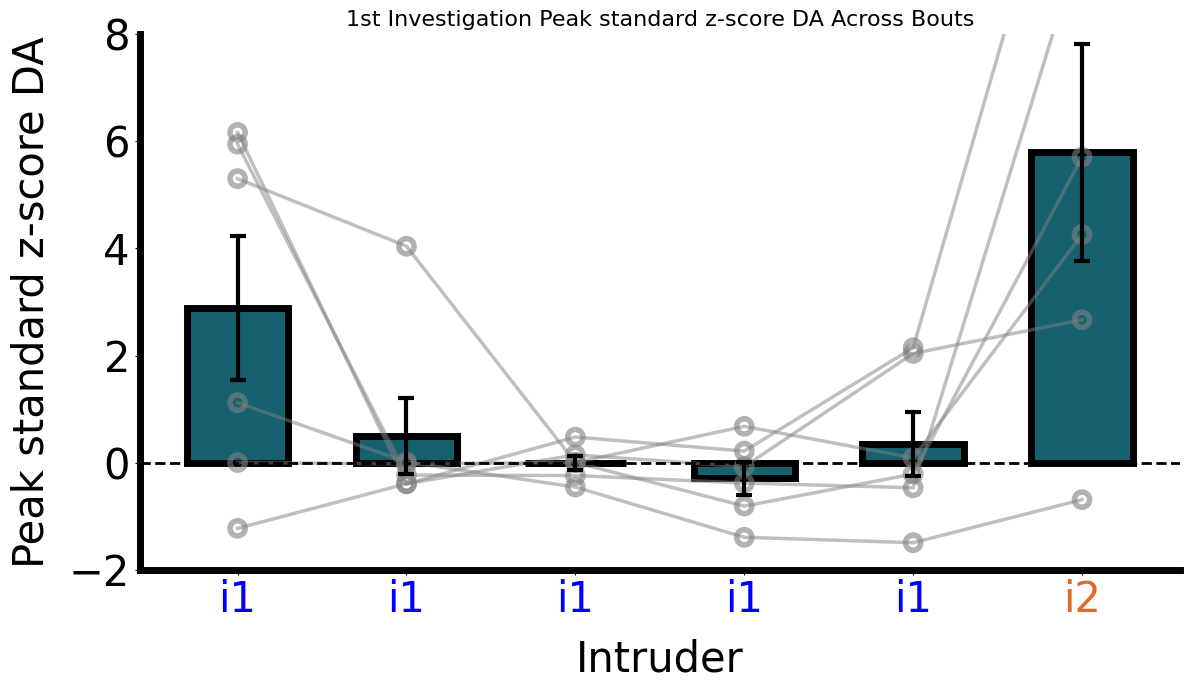

In [21]:
# Average Bout Duration Across Bouts
plot_behavior_times_across_bouts_gray(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title="1st Investigation Peak standard z-score DA Across Bouts",
    xlabel="Intruder",
    ylabel="Peak standard z-score DA",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 7),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_C1-3_Peak_Across_Bouts.png"
)

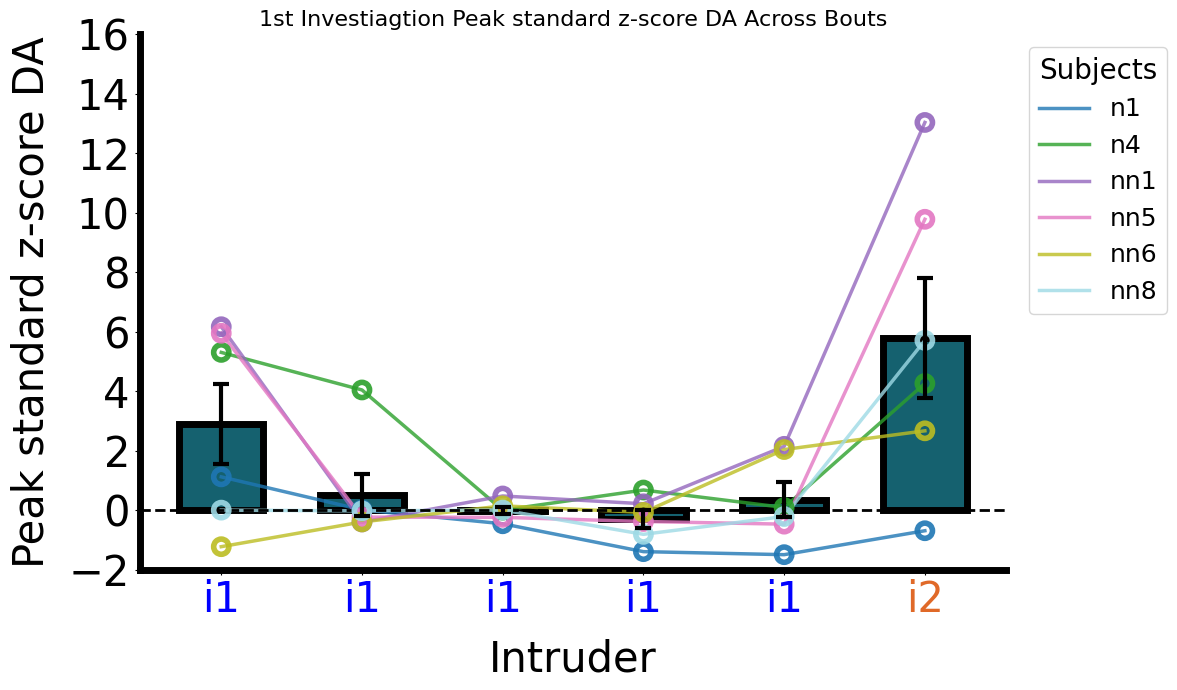

In [22]:
# Average Bout Duration Across Bouts
plot_behavior_times_across_bouts_colored(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title="1st Investiagtion Peak standard z-score DA Across Bouts",
    xlabel="Intruder",
    ylabel="Peak standard z-score DA",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 15),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_C1-3_Peak_Across_Bouts_WIDENTITIES.png"
)

In [23]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, #otal_avg_bout_duration
                                  use_adaptive=False, 
                                  allow_bout_extension=False,
                                  mode='standard')

Processing behaviors for n1-240507-080133...
Processing behaviors for n4-240507-140651...
Processing behaviors for nn1-250115-052028...
Processing behaviors for nn5-250114-083827...
Processing behaviors for nn6-250114-093117...
Processing behaviors for nn8-250114-103839...
Computing DA metrics for n1-240507-080133 ...
Computing DA metrics for n4-240507-140651 ...
Computing DA metrics for nn1-250115-052028 ...
Computing DA metrics for nn5-250114-083827 ...
Computing DA metrics for nn6-250114-093117 ...
Computing DA metrics for nn8-250114-103839 ...


In [24]:
experiment.trials['p1-240516-064158'].behaviors.head(6)

KeyError: 'p1-240516-064158'

In [ ]:
exp_da_dict = get_trial_dataframes(experiment)
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']


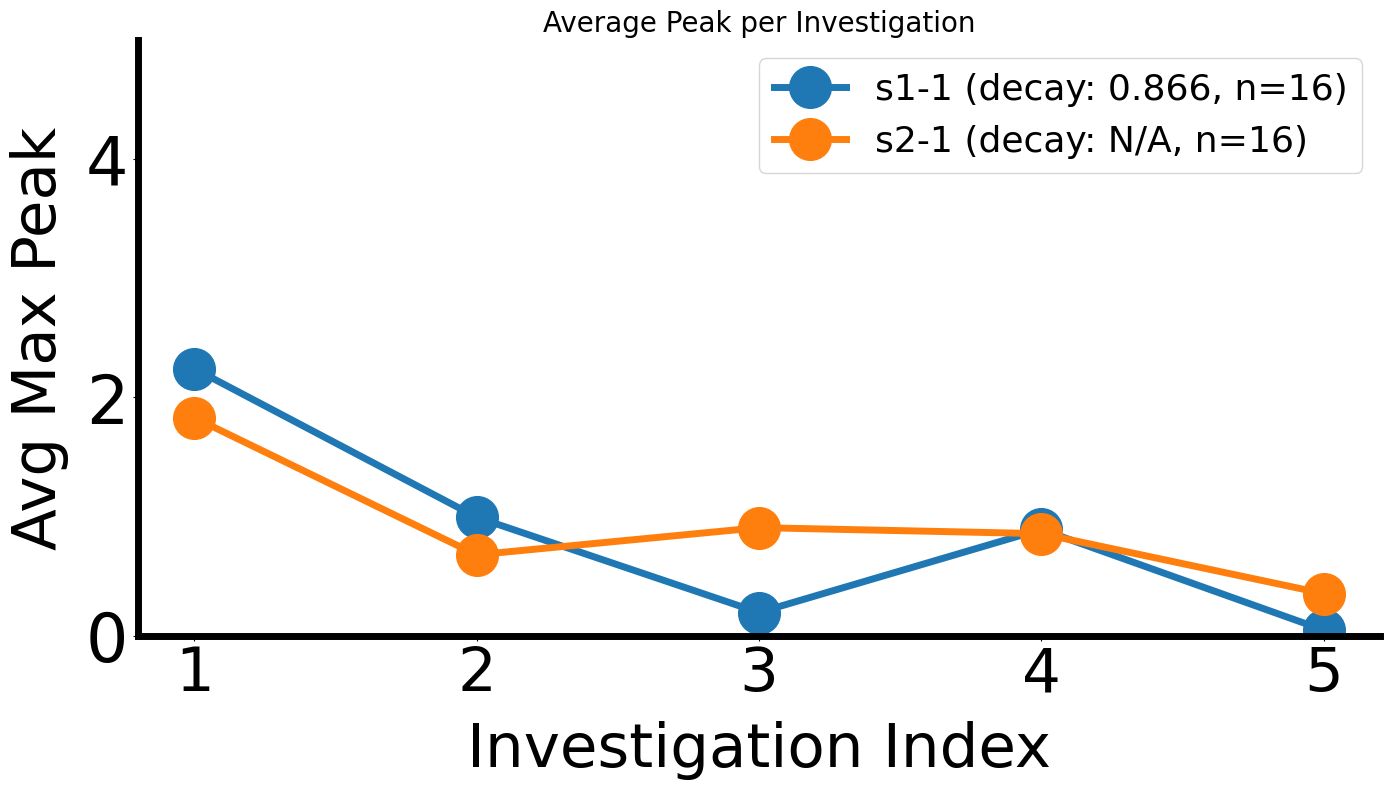


=== Computed Metric (DECAY): ===
Bout: s1-1, decay = 0.866
Bout: s2-1, decay = nan


In [ ]:
# Suppose exp_da_dict = {"nn8": df_nn8, "nn3": df_nn3, ...}

# Plot the first 3 investigations for bouts s1-1 and s1-2:
df_final = plot_peak_for_subsequent_investigations_custom(
    exp_da_dict,
    selected_bouts=["s1-1", "s2-1"],
    n_subsequent_investigations=5,
    peak_col="Max Peak",
    metric_type='decay', 
    ylim=(0, 5)
)
